In [1]:
import re
import requests
import lxml.html
import numpy as np
import pandas as pd
import math
from bs4 import BeautifulSoup
from os import path
import pandas
try:
    import urllib
except ImportError:
    from urlparse import urlparse

r = requests.get('https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares') #URL Request

root = BeautifulSoup(r.content) #Beautiful Soup 
table = root.find("table").prettify() #Find and prettify

df = pd.read_html(table)[0] #Read table with pandas

# Create df columns and indexes
df.columns = ['rank', 'x_class', 'date', 'region', 'start_time', 'max_time', 'end_time', 'movie']
df.index = range(1,51)

In [2]:
df

,rank,x_class,date,region,start_time,max_time,end_time,movie
1,1,X28.0,2003/11/04,486,19:29,19:53,20:06,Movie View archive
2,2,X20.0,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
3,3,X17.2,2003/10/28,486,09:51,11:10,11:24,Movie View archive
4,4,X17.0,2005/09/07,808,17:17,17:40,18:03,Movie View archive
5,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
6,6,X10.0,2003/10/29,486,20:37,20:49,21:01,Movie View archive
7,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
8,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
9,9,X9.0,2006/12/05,930,10:18,10:35,10:45,Movie View archive
10,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


In [3]:
del df['movie'] #Delete Movie Row

In [4]:
#Create DateTime objects
df["start_date_time"] = pd.to_datetime(df['date'] + ' ' + df['start_time'])
df["max_date_time"] = pd.to_datetime(df['date'] + ' ' + df['max_time'])
df["end_date_time"] = pd.to_datetime(df['date'] + ' ' + df['end_time'])

del df['start_time']
del df['max_time']
del df['end_time']
del df['date']

#Reorder columns now that date time cols are in place
newcol = ['rank', 'x_class', 'start_date_time', 'max_date_time', 'end_date_time', 'region']

#replace - with NaN
df.replace('-', 'NaN')

df = df.reindex(columns=newcol)

In [5]:
df

,rank,x_class,start_date_time,max_date_time,end_date_time,region
1,1,X28.0,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20.0,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17.0,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10.0,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9.0,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [6]:
import re
import requests
import lxml.html
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from os import path
import math
import matplotlib.pyplot as plt 
import pandas
try:
    import urllib
except ImportError:
    from urlparse import urlparse
    
r = requests.get('https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html') #URL Request

root = BeautifulSoup( r.content ) #Beautiful Soup
text = root.find("pre").get_text() #Find table as text
text = text.split('\n') #Split into table by splitting at newlines
text = text[12:-3] #Get rid of useless lines
#Make new dateframe with appropriate columns
df2 = pd.DataFrame(columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_freq', 'end_freq',\
                                'flare_location','flare_region', 'flare_classification', 'cme_date', 'cme_time',\
                                'cme_angle', 'cme_width','cme_speed'], index = range(1,len(text)+1))

#Split each text line into approprate columns
row = 0
for line in text:
    line2 = line.split()
    line2 = line2[0:14]
    col = 0
    for l in line2:
        df2.iat[row,col] = l
        col+=1
    row+=1


In [7]:
df2

,start_date,start_time,end_date,end_time,start_freq,end_freq,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed
1,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
2,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
3,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
4,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
5,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
6,1997/11/03,05:15,11/03,12:00,14000,250,S20W13,8100,C8.6,11/03,05:28,240,109,227
7,1997/11/03,10:30,11/03,11:30,14000,5000,S16W21,8100,M4.2,11/03,11:11,233,122,352
8,1997/11/04,06:00,11/05,04:30,14000,100,S14W33,8100,X2.1,11/04,06:10,Halo,360,785
9,1997/11/06,12:20,11/07,08:30,14000,100,S18W63,8100,X9.4,11/06,12:10,Halo,360,1556
10,1997/11/27,13:30,11/27,14:00,14000,7000,N17E63,8113,X2.6,11/27,13:56,98,91,441


In [8]:
#Replace a bunch of no data symbols with NaN
df2 = df2.replace("----", "NaN").replace("-----", "NaN").replace("--/--","NaN").replace("--:--","NaN").replace("EP?","NaN")
df2 = df2.replace("---","NaN").replace("------","NaN").replace("????","NaN").replace("Back","NaN").replace("DIM","NaN")
df2 = df2.replace("BACK","NaN").replace("altr","NaN").replace("DSF","NaN").replace("EP","NaN").replace("FILA","NaN")
is_halo = [None] * (len(df2.index))
width = [None] * (len(df2.index))
#Make array checking if a flare is a Halo or if it's width has a lower bound
for i in range(1,len(df2.index)+1):
    if df2["cme_angle"][i] == "Halo":
        df2["cme_angle"][i] = "NA"
        is_halo[i-1] = True
    else:
        is_halo[i-1] = False
    if df2["cme_width"][i][0] == ">":
        df2["cme_width"][i] = " "
        width[i-1] = True
    else:
        width[i-1] = False
#create the new cols
df2["is_halo"] = is_halo
df2["width_lower_bound"] = width

#make datetime objects
for row in range(0,len(df2)):
    date = df2.iat[row,0].split('/')   
    yr = date[0]
    month = date[1]
    day = date[2]
    df2.iat[row, 0] = yr + '-' + month + '-' + day
    for i in [2,9]:
        if not df2.iat[row,i] == "NaN":
            date = df2.iat[row,i].split('/')   
            month = date[0]
            day = date[1]
            df2.iat[row, i] = yr + '-' + month + '-' + day
#rewrite 24:00 as 00:00         
df2["end_time"] = df2["end_time"].replace('24:00', '00:00')
            
cme_dt = [None] * (len(df2.index))
for row in range(0,len(df2)):
    if not df2.iat[row,9] == "NaN":
        cme_dt[row] = pd.to_datetime(df2.iat[row,9] + ' ' + df2.iat[row,10])
    else:
        cme_dt[row] = "NaN"
df2["cme_date_time"] = cme_dt    
df2['start_date_time'] = pd.to_datetime(df2['start_date'] + ' ' + df2['start_time'])
df2['end_date_time'] = pd.to_datetime(df2['end_date'] + ' ' + df2['end_time'])
# use to_datetime. make all dates in form year-month-day. make all times hour:minute:second.
#reindex new cols
newcol = ['start_date_time', 'end_date_time', 'start_freq', 'end_freq',\
                                'flare_location','flare_region', 'flare_classification', 'cme_date_time',\
                                'cme_angle', 'cme_width','cme_speed','is_halo','width_lower_bound']
df2.reindex(columns=newcol)

,start_date_time,end_date_time,start_freq,end_freq,flare_location,flare_region,flare_classification,cme_date_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False
8,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,True,False
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False


In [9]:
#select only flares with X
df3 = df2.loc[df2['flare_classification'].str.contains('X')]
#Remove X and sort by number
for i in range(len(df3)):
    df3.iat[i,8] = float(df3.iat[i,8][1:])
df3 = df3.sort_values(by=['flare_classification'],ascending = False)
#only take top 50
df3 = df3[:49]
#readd x
for i in range(len(df3)):
    df3.iat[i,8] = "X"+ str(df3.iat[i,8])
    if len(df3.iat[i,7]) == 5:
        df3.iat[i,7] = df3.iat[i,7][1:]
#make cols so they mimic SWL columns
newcol = ['flare_classification', 'start_date', 'flare_region', 'start_time',"cme_time","end_time"]
df3.reindex(columns=newcol)
df2

,start_date,start_time,end_date,end_time,start_freq,end_freq,flare_location,flare_region,flare_classification,cme_date,cme_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,cme_date_time,start_date_time,end_date_time
1,1997-04-01,14:00,1997-04-01,14:15,8000,4000,S25E16,8026,M1.3,1997-04-01,15:18,74,79,312,False,False,1997-04-01 15:18:00,1997-04-01 14:00:00,1997-04-01 14:15:00
2,1997-04-07,14:30,1997-04-07,17:30,11000,1000,S28E19,8027,C6.8,1997-04-07,14:27,NA,360,878,True,False,1997-04-07 14:27:00,1997-04-07 14:30:00,1997-04-07 17:30:00
3,1997-05-12,05:15,1997-05-14,16:00,12000,80,N21W08,8038,C1.3,1997-05-12,05:30,NA,360,464,True,False,1997-05-12 05:30:00,1997-05-12 05:15:00,1997-05-14 16:00:00
4,1997-05-21,20:20,1997-05-21,22:00,5000,500,N05W12,8040,M1.3,1997-05-21,21:00,263,165,296,False,False,1997-05-21 21:00:00,1997-05-21 20:20:00,1997-05-21 22:00:00
5,1997-09-23,21:53,1997-09-23,22:16,6000,2000,S29E25,8088,C1.4,1997-09-23,22:02,133,155,712,False,False,1997-09-23 22:02:00,1997-09-23 21:53:00,1997-09-23 22:16:00
6,1997-11-03,05:15,1997-11-03,12:00,14000,250,S20W13,8100,C8.6,1997-11-03,05:28,240,109,227,False,False,1997-11-03 05:28:00,1997-11-03 05:15:00,1997-11-03 12:00:00
7,1997-11-03,10:30,1997-11-03,11:30,14000,5000,S16W21,8100,M4.2,1997-11-03,11:11,233,122,352,False,False,1997-11-03 11:11:00,1997-11-03 10:30:00,1997-11-03 11:30:00
8,1997-11-04,06:00,1997-11-05,04:30,14000,100,S14W33,8100,X2.1,1997-11-04,06:10,NA,360,785,True,False,1997-11-04 06:10:00,1997-11-04 06:00:00,1997-11-05 04:30:00
9,1997-11-06,12:20,1997-11-07,08:30,14000,100,S18W63,8100,X9.4,1997-11-06,12:10,NA,360,1556,True,False,1997-11-06 12:10:00,1997-11-06 12:20:00,1997-11-07 08:30:00
10,1997-11-27,13:30,1997-11-27,14:00,14000,7000,N17E63,8113,X2.6,1997-11-27,13:56,98,91,441,False,False,1997-11-27 13:56:00,1997-11-27 13:30:00,1997-11-27 14:00:00


In [10]:
newcol = ['start_date_time', 'end_date_time', 'start_freq', 'end_freq',\
                                'flare_location','flare_region', 'flare_classification', 'cme_date_time',\
                                'cme_angle', 'cme_width','cme_speed','is_halo','width_lower_bound']
df2 = df2.reindex(columns=newcol)

rank = [None]*len(df2)
# Check for match, match is if date and region are very similar, and classification has X
for i in range(len(df2)):
    if len(df2.iat[i,5]) == 5:
           df2.iat[i,5] = df2.iat[i,5][1:]
    for j in range(len(df)):
        inside = False
        if (df2.iat[i,6][0] == "X") and not inside and not df2.iat[i,5] == "NaN" and abs(int(df2.iat[i,5])-int(df.iat[j,5]))<20 and abs((df2.iat[i,0]-df.iat[j,2])/np.timedelta64(1,'D')) < 1:
            rank[i] = j+1
            inside = True
        elif rank == None:
            rank[i] = "NaN"
#make new rank col          
df2['SWL Rank'] = rank 
df2

,start_date_time,end_date_time,start_freq,end_freq,flare_location,flare_region,flare_classification,cme_date_time,cme_angle,cme_width,cme_speed,is_halo,width_lower_bound,SWL Rank
1,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,False,False,NaN
2,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,True,False,NaN
3,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,True,False,NaN
4,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,False,False,NaN
5,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,False,False,NaN
6,1997-11-03 05:15:00,1997-11-03 12:00:00,14000,250,S20W13,8100,C8.6,1997-11-03 05:28:00,240,109,227,False,False,NaN
7,1997-11-03 10:30:00,1997-11-03 11:30:00,14000,5000,S16W21,8100,M4.2,1997-11-03 11:11:00,233,122,352,False,False,NaN
8,1997-11-04 06:00:00,1997-11-05 04:30:00,14000,100,S14W33,8100,X2.1,1997-11-04 06:10:00,NA,360,785,True,False,NaN
9,1997-11-06 12:20:00,1997-11-07 08:30:00,14000,100,S18W63,8100,X9.4,1997-11-06 12:10:00,NA,360,1556,True,False,7.0
10,1997-11-27 13:30:00,1997-11-27 14:00:00,14000,7000,N17E63,8113,X2.6,1997-11-27 13:56:00,98,91,441,False,False,50.0


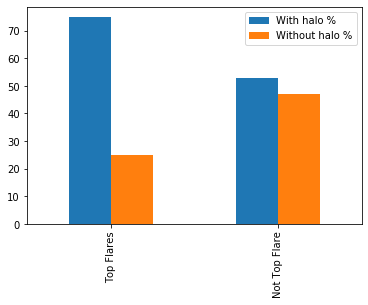

In [25]:
%matplotlib inline
#plot intent is to see if being a larger flare effects the likely hood of a flare to have a halo
hctop=0
numtop = 0
numtot = 0
hctot=0
#Go through each flare, count how many are halos out of the top flares and halos out of the res
for i in range(len(df2)):
    if abs(df2.iat[i,-1])>0:
        numtop+=1
        hctop+=(df2.iat[i,-3] == True)
    else:
        numtot+=1
        hctot+=(df2.iat[i,-3] == True)
#create new dataframe, with percentages       
df4 = pd.DataFrame(columns = ["With halo %","Without halo %"],index = ["Top Flares", "Not Top Flare"])
df4.iat[0,0] = (hctop/numtop)*100
df4.iat[0,1] = ((numtop - hctop)/numtop) *100
df4.iat[1,0] = (hctot/numtot)*100
df4.iat[1,1] = ((numtot - hctot)/numtot) *100
my_plot = df4.plot(kind='bar')
#The graph has the percentage of flares that are and aren't halos for the top flares and the not top flares. The
# x-axis splits the flares up, with the 2 bars representing with and without halos. The y-axis is the percentages

#This graph shows that whether a flare is more powerful effects the likely hood of a halo.
# over 75% of the top flares had a halo, but only around 53% of the not top flares did